In [341]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [342]:
points_left = [[958, 38, 1],
               [1117, 111, 1],
               [874, 285, 1],
               [707, 218, 1],
               [292, 569, 1],
               [770, 969, 1],
               [770, 1465, 1],
               [317, 1057, 1]]
points_right = [[933, 33, 1],
                [1027, 132, 1],
                [692, 223, 1],
                [595, 123, 1],
                [272, 360, 1],
                [432, 814, 1],
                [414, 1284, 1],
                [258, 818, 1]]

points_left = np.array(points_left)
points_right = np.array(points_right)


zipp = list(zip(points_left, points_right))
x1, y1 = zipp[0]
x2, y2 = zipp[1]
x3, y3 = zipp[2]
x4, y4 = zipp[3]
x9, y9 = zipp[4]
x10, y10 = zipp[5]
x11, y11 = zipp[6]
x12, y12 = zipp[7]

x6 = np.array([1094, 536, 1.])
y6 = np.array([980, 535, 1.])
x7 = np.array([862, 729, 1.])
y7 = np.array([652, 638, 1.])
x8 = np.array([710, 648, 1.])
y8 = np.array([567, 532, 1.])
x14 = np.array([1487, 598, 1.])
y14 = np.array([1303, 700, 1.])
x15 = np.array([1462, 1079, 1.])
y15 = np.array([1257, 1165, 1.])
y13 = np.array([1077, 269, 1.])


In [343]:
print('LEVA \t--> DESNA: ', '==================================', sep='\n')
print('\n'.join([f'{(a[0], a[1], a[2])} \t--> {(b[0], b[1], b[2])}' for a, b in zip(points_left, points_right)]))


LEVA 	--> DESNA: 
(958, 38, 1) 	--> (933, 33, 1)
(1117, 111, 1) 	--> (1027, 132, 1)
(874, 285, 1) 	--> (692, 223, 1)
(707, 218, 1) 	--> (595, 123, 1)
(292, 569, 1) 	--> (272, 360, 1)
(770, 969, 1) 	--> (432, 814, 1)
(770, 1465, 1) 	--> (414, 1284, 1)
(317, 1057, 1) 	--> (258, 818, 1)


In [344]:
def to_pixel_coords(x):
    return np.round(x/x[2])

def to_affine(x):
    return (x/x[-1])[:-1]

In [345]:
def get_vec_product_matrix(v):
    p1, p2, p3 = v
    return np.array([[0, -p3, p2],
                     [p3, 0, -p1],
                     [-p2, p1, 0]])

In [346]:
def get_eq(x, y):
    a1, a2, a3 = x
    b1, b2, b3 = y
    return np.array([a1*b1, a2*b1, a3*b1, a1*b2, a2*b2, a3*b2, a1*b3, a2*b3, a3*b3])
    

In [347]:
def get_f_system(xs, ys):
    return np.array([get_eq(x, y) for x, y in zip(xs, ys)])

In [348]:
### Returns fundamental matrix
def solve_system_matrix(M):
    u, d, v = la.svd(M)
    return np.reshape(v[-1], (3, 3))


In [349]:
def get_epipoles_and_new_F(F):
    u, d, v = la.svd(F)
    e1 = v[-1]
    e2 = u.T[-1]
    e1 = (1.0/e1[2])*e1
    e2 = (1.0/e2[2])*e2

    d1 = np.diag([1, 1, 0]) @ d
    d1 = np.diag(d1)
    f1 = u @ d1 @ v
    return e1, e2, f1

In [350]:
def get_T1():
    return np.hstack((np.eye(3), np.array([[0], [0], [0]])))

def get_T2(F, e2):
    return np.hstack((get_vec_product_matrix(e2) @ F, [[e2[0]], [e2[1]], [e2[2]]]))


In [351]:
def the_cross(a, b, c, d, e, f, g, h, i, j):
    ab = np.cross(a, b)
    cd = np.cross(c, d)
    abcde = np.cross(np.cross(ab, cd), e)
    fg = np.cross(f, g)
    hi = np.cross(h, i)
    fghij = np.cross(np.cross(fg, hi), j)
    return np.cross(abcde, fghij)
    

In [352]:
def get_triang_eq(xx, yy, T1, T2):
    return np.array([xx[1]*T1[2] - xx[2]*T1[1], -xx[0]*T1[2] + xx[2]*T1[0], yy[1]*T2[2] - yy[2]*T2[1], -yy[0]*T2[2] + yy[2]*T2[0]])



In [353]:
def get_3d_rec(xx, yy, T1, T2):
    # print(f'Pokrenuto za {xx, yy}')
    # print(f'get_triang_eq(xx, yy, T1, T2) = {get_triang_eq(xx, yy, T1, T2)}')
    # print(f'la.svd(get_triang_eq(xx, yy, T1, T2)) = {la.svd(get_triang_eq(xx, yy, T1, T2))}')
    # print(f'la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1] = {la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1]}')
    # print(f'to_affine(la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1]) = {to_affine(la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1])}')
    return to_affine(la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1])
    

In [354]:
F = solve_system_matrix(get_f_system(points_left, points_right))
e1, e2, FF = get_epipoles_and_new_F(F)

In [355]:
x5  = the_cross(x4, x8, x6, x2, x1, x1, x4, x3, x2, x8)
x13 = the_cross(x9, x10, x11, x12, x14, x11, x15, x10, x14, x9)
x16 = the_cross(x10, x14, x11, x15, x12, x9, x10, x11, x12, x15)
y5  = the_cross(y4, y8, y6, y2, y1, y1, y4, y3, y2, y8)
y16 = the_cross(y10, y14, y11, y15, y12, y9, y10, y11, y12, y15)

In [356]:
img1 = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16]
img2 = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16]

In [357]:
reconstructed = [get_3d_rec(x, y, T1, T2) for x, y in zip(img1, img2)]
reconstructed = np.array(reconstructed)

def mul400(x):
    print(f'Multiplying\n{np.diag([1, 1, 400])}\nwith\n{x}')
    return np.diag([1, 1, 400]) @ x

mul400fast = np.vectorize(mul400)

reconstructed400 = np.array([mul400(x) for x in reconstructed])


Multiplying
[[  1   0   0]
 [  0   1   0]
 [  0   0 400]]
with
[491.84353036   1.59313908   0.50901647]
Multiplying
[[  1   0   0]
 [  0   1   0]
 [  0   0 400]]
with
[5.04614316e+02 2.83555175e+01 4.47171241e-01]
Multiplying
[[  1   0   0]
 [  0   1   0]
 [  0   0 400]]
with
[462.90170064 132.73681428   0.52557536]
Multiplying
[[  1   0   0]
 [  0   1   0]
 [  0   0 400]]
with
[451.53824135 124.86509964   0.63476922]
Multiplying
[[  1   0   0]
 [  0   1   0]
 [  0   0 400]]
with
[383.93229516 128.68942693   0.38701313]
Multiplying
[[  1   0   0]
 [  0   1   0]
 [  0   0 400]]
with
[4.02597956e+02 1.34081479e+02 3.52730610e-01]
Multiplying
[[  1   0   0]
 [  0   1   0]
 [  0   0 400]]
with
[341.96774372 238.66413756   0.38548329]
Multiplying
[[  1   0   0]
 [  0   1   0]
 [  0   0 400]]
with
[318.68122559 246.47859012   0.43737882]
Multiplying
[[  1   0   0]
 [  0   1   0]
 [  0   0 400]]
with
[204.98231907 390.5749795    0.69865921]
Multiplying
[[  1   0   0]
 [  0   1   0]
 [  0   0 

In [358]:
print(reconstructed400)

[[491.84353036   1.59313908 203.60658798]
 [504.61431592  28.35551747 178.86849645]
 [462.90170064 132.73681428 210.23014481]
 [451.53824135 124.86509964 253.90768627]
 [383.93229516 128.68942693 154.80525195]
 [402.59795558 134.0814793  141.09224395]
 [341.96774372 238.66413756 154.19331627]
 [318.68122559 246.47859012 174.95152628]
 [204.98231907 390.5749795  279.46368408]
 [299.38198471 356.35677875 154.36293064]
 [218.13111056 392.90741712 112.57613311]
 [133.99481211 434.96809643 168.03561831]
 [373.66295923  90.8437277  150.43037928]
 [458.57072564 119.09383245 118.611055  ]
 [386.63127509 184.15062058  98.41656141]
 [333.57408108 142.15976065 122.0229413 ]]


[(491.8435303581177, 504.6143159215377),
 (1.593139076887807, 28.35551746870268),
 (203.6065879846317, 178.86849644569742)]

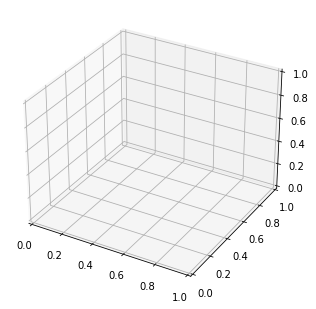

In [365]:
fig = plt.figure()
ax = Axes3D(fig)

rx1 = reconstructed400[0]
rx2 = reconstructed400[1]
rx1x2forplot = list(zip(rx1, rx2))
rx1x2forplot
ax.plot(xs=list(rx1x2forplot[0]), ys=list(rx1x2forplot[1]), zs=list())

# ?ax.plot

# fig.show()

